# Analyse der IPA-Wortlisten

Kurze Analyse der deutschen und englischen IPA-Dateien:
- `de (1).txt` - Deutsche Wörter mit IPA-Transkription
- `en_US.txt` - Englische Wörter mit IPA-Transkription

In [1]:
import os

def analyze_ipa_file(filepath):
    """Analysiere eine IPA-Wortliste."""
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    words, ipas = [], []
    for line in lines:
        if '\t' in line:
            parts = line.strip().split('\t')
            if len(parts) >= 2:
                words.append(parts[0])
                ipas.append(parts[1])
    
    word_lens = [len(w) for w in words]
    ipa_lens = [len(i) for i in ipas]
    
    return {
        'datei': os.path.basename(filepath),
        'größe_mb': os.path.getsize(filepath) / 1024 / 1024,
        'einträge': len(words),
        'wort_länge_avg': sum(word_lens) / len(word_lens),
        'wort_länge_min': min(word_lens),
        'wort_länge_max': max(word_lens),
        'ipa_länge_avg': sum(ipa_lens) / len(ipa_lens),
        'beispiele': [(words[i], ipas[i]) for i in [0, 100, 1000, -1]]
    }

# Analysiere beide Dateien
de_stats = analyze_ipa_file('de (1).txt')
en_stats = analyze_ipa_file('en_US.txt')

print("=" * 50)
print("DEUTSCH")
print("=" * 50)
print(f"Datei: {de_stats['datei']}")
print(f"Größe: {de_stats['größe_mb']:.1f} MB")
print(f"Einträge: {de_stats['einträge']:,}")
print(f"Wortlänge: Ø {de_stats['wort_länge_avg']:.1f} (min: {de_stats['wort_länge_min']}, max: {de_stats['wort_länge_max']})")
print(f"IPA-Länge: Ø {de_stats['ipa_länge_avg']:.1f}")
print(f"\nBeispiele:")
for w, i in de_stats['beispiele']:
    print(f"  {w:20} → {i}")

print("\n" + "=" * 50)
print("ENGLISCH")
print("=" * 50)
print(f"Datei: {en_stats['datei']}")
print(f"Größe: {en_stats['größe_mb']:.1f} MB")
print(f"Einträge: {en_stats['einträge']:,}")
print(f"Wortlänge: Ø {en_stats['wort_länge_avg']:.1f} (min: {en_stats['wort_länge_min']}, max: {en_stats['wort_länge_max']})")
print(f"IPA-Länge: Ø {en_stats['ipa_länge_avg']:.1f}")
print(f"\nBeispiele:")
for w, i in en_stats['beispiele']:
    print(f"  {w:20} → {i}")

DEUTSCH
Datei: de (1).txt
Größe: 29.3 MB
Einträge: 787,104
Wortlänge: Ø 12.0 (min: 1, max: 117)
IPA-Länge: Ø 17.2

Beispiele:
  0,2-Liter-Flaschen   → /nʊlkɔmat͡svaɪ̯ˈliːtɐˌflaʃn̩/, /nʊlkɔmat͡svaɪ̯ˈlɪtɐˌflaʃn̩/
  10-jähriger          → /ˈt͡seːnˌjɛːʁɪɡɐ/
  9-minütig            → /ˈnɔɪ̯nmiˌnyːtɪk/, /ˈnɔɪ̯nmiˌnyːtɪç/
  μm                   → /mikʁoˈmeːtɐ/, /ˈmiːkʁoˌmeːtɐ/

ENGLISCH
Datei: en_US.txt
Größe: 3.0 MB
Einträge: 125,927
Wortlänge: Ø 7.5 (min: 1, max: 28)
IPA-Länge: Ø 11.0

Beispiele:
  'bout                → /ˈbaʊt/
  abbreviate           → /əˈbɹiviˌeɪt/
  adelpha              → /əˈdɛɫfə/
  zywicki              → /zɪˈwɪki/


## Visualisierung der Datenbereinigung

Die folgenden Diagramme zeigen den Effekt der Filterung auf beide Datensätze.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Daten für die Visualisierung
data = {
    'Deutsch': {
        'raw': 787104,
        'valid': 495308,
        'discarded': 787104 - 495308
    },
    'Englisch': {
        'raw': 125927,
        'valid': 39669,
        'discarded': 125927 - 39669
    }
}

# Prozentuale Anteile berechnen
for lang in data:
    data[lang]['valid_pct'] = data[lang]['valid'] / data[lang]['raw'] * 100
    data[lang]['discarded_pct'] = data[lang]['discarded'] / data[lang]['raw'] * 100

print("Filterstatistik:")
print("-" * 50)
for lang, vals in data.items():
    print(f"{lang}:")
    print(f"  Rohdaten:  {vals['raw']:>10,}")
    print(f"  Behalten:  {vals['valid']:>10,} ({vals['valid_pct']:.1f}%)")
    print(f"  Entfernt:  {vals['discarded']:>10,} ({vals['discarded_pct']:.1f}%)")
    print()

Filterstatistik:
--------------------------------------------------
Deutsch:
  Rohdaten:     787,104
  Behalten:     495,308 (62.9%)
  Entfernt:     291,796 (37.1%)

Englisch:
  Rohdaten:     125,927
  Behalten:      39,669 (31.5%)
  Entfernt:      86,258 (68.5%)



### 1. Stacked Bar Chart (Relativ) - Datenqualität im Vergleich

Zeigt den prozentualen Anteil valider vs. verworfener Einträge. Die englische Liste war deutlich "schmutziger" (68% Müll) als die deutsche (37% Müll).

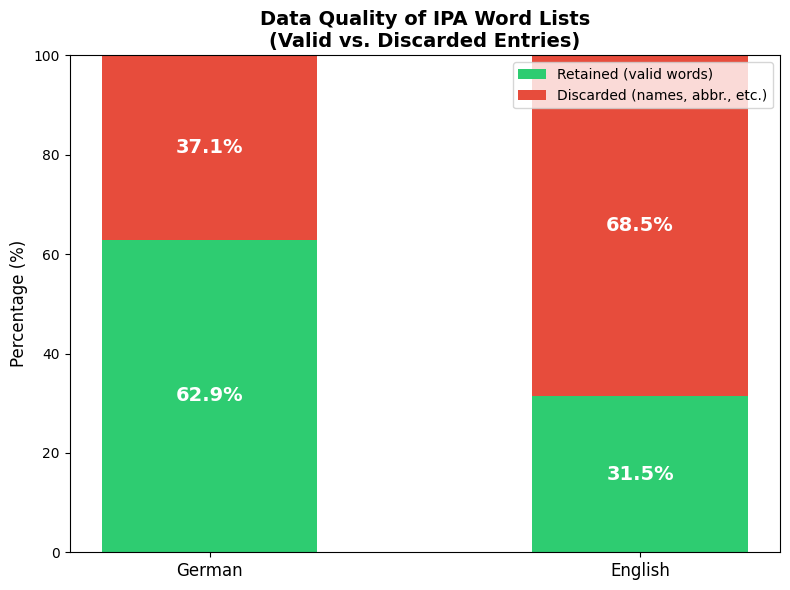

In [3]:
# Stacked Bar Chart (Relativ - 100%)
fig, ax = plt.subplots(figsize=(8, 6))

languages = ['German', 'English']
valid_pct = [data['Deutsch']['valid_pct'], data['Englisch']['valid_pct']]
discarded_pct = [data['Deutsch']['discarded_pct'], data['Englisch']['discarded_pct']]

x = np.arange(len(languages))
width = 0.5

# Stacked bars
bars1 = ax.bar(x, valid_pct, width, label='Retained (valid words)', color='#2ecc71')
bars2 = ax.bar(x, discarded_pct, width, bottom=valid_pct, label='Discarded (names, abbr., etc.)', color='#e74c3c')

# Labels
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Data Quality of IPA Word Lists\n(Valid vs. Discarded Entries)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(languages, fontsize=12)
ax.legend(loc='upper right')
ax.set_ylim(0, 100)

# Prozentwerte in die Balken schreiben
for i, (v, d) in enumerate(zip(valid_pct, discarded_pct)):
    ax.text(i, v/2, f'{v:.1f}%', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(i, v + d/2, f'{d:.1f}%', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

### 2. Grouped Bar Chart (Absolut) - Größenordnung der Datensätze

Zeigt die absoluten Zahlen vorher/nachher. Der deutsche Datensatz ist selbst nach Bereinigung noch deutlich größer als der englische Rohdatensatz.

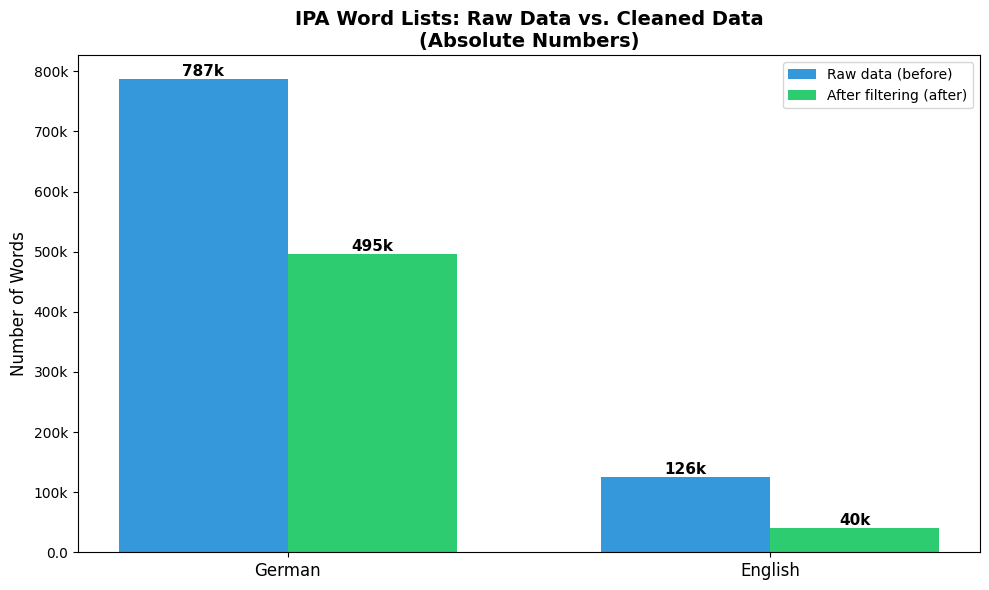

In [4]:
# Grouped Bar Chart (Absolut)
fig, ax = plt.subplots(figsize=(10, 6))

languages = ['German', 'English']
raw_counts = [data['Deutsch']['raw'], data['Englisch']['raw']]
valid_counts = [data['Deutsch']['valid'], data['Englisch']['valid']]

x = np.arange(len(languages))
width = 0.35

bars1 = ax.bar(x - width/2, raw_counts, width, label='Raw data (before)', color='#3498db')
bars2 = ax.bar(x + width/2, valid_counts, width, label='After filtering (after)', color='#2ecc71')

ax.set_ylabel('Number of Words', fontsize=12)
ax.set_title('IPA Word Lists: Raw Data vs. Cleaned Data\n(Absolute Numbers)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(languages, fontsize=12)
ax.legend()

# Werte über den Balken
def format_number(n):
    if n >= 1000000:
        return f'{n/1000000:.1f}M'
    elif n >= 1000:
        return f'{n/1000:.0f}k'
    return str(n)

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, format_number(height),
            ha='center', va='bottom', fontsize=11, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, format_number(height),
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Y-Achse formatieren
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format_number(x)))

plt.tight_layout()
plt.show()

### 3. Sankey-Diagramm - Datenfluss der Filterung

Visualisiert den Filterprozess als Flussdiagramm: Rohdaten fließen durch den Filter und werden in valide Wörter und verworfene Einträge aufgeteilt.

In [2]:
# Sankey-Diagramm mit Plotly
import plotly.graph_objects as go

# Knoten: 0=DE Raw, 1=EN Raw, 2=DE Valid, 3=DE Discarded, 4=EN Valid, 5=EN Discarded
labels = [
    "DE Raw Data<br>(787k)", 
    "EN Raw Data<br>(126k)",
    "DE Valid<br>(495k)",
    "DE Discarded<br>(292k)",
    "EN Valid<br>(40k)",
    "EN Discarded<br>(86k)"
]

# Verbindungen (source, target, value)
source = [0, 0, 1, 1]  # Von DE Raw, DE Raw, EN Raw, EN Raw
target = [2, 3, 4, 5]  # Zu DE Valid, DE Discarded, EN Valid, EN Discarded
values = [
    data['Deutsch']['valid'],
    data['Deutsch']['discarded'],
    data['Englisch']['valid'],
    data['Englisch']['discarded']
]

# Farben
node_colors = ['#3498db', '#3498db', '#2ecc71', '#e74c3c', '#2ecc71', '#e74c3c']
link_colors = ['rgba(46, 204, 113, 0.4)', 'rgba(231, 76, 60, 0.4)', 
               'rgba(46, 204, 113, 0.4)', 'rgba(231, 76, 60, 0.4)']

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=link_colors
    )
)])

fig.update_layout(
    title_text="Data Flow: Filtering of IPA Word Lists",
    title_font_size=16,
    font_size=12,
    height=400
)

fig.show()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
from typing import List, Tuple
import os
from typing import List, Tuple
def load_data(file_path: str) -> List[str]:
    with open(file_path, 'r', encoding='utf-8') as file:
        return [line.strip() for line in file if line.strip()]
def extract_letter_to_ipa_mapping(data: List[str]) -> List[Tuple[str, str]]:
    mapping = []
    for line in data:
        parts = line.split()
        if len(parts) >= 2:
            letter, ipa = parts[0], parts[1]
            mapping.append((letter, ipa))
    return mapping
def phoneme_frequency_distribution(mapping: List[Tuple[str, str]]) -> Counter:
    phonemes = [ipa for _, ipa in mapping]
    return Counter(phonemes)
def phoneme_length_distribution(mapping: List[Tuple[str, str]]) -> List[int]:
    return [len(ipa) for _, ipa in mapping]
# Load and process data
german_file = os.path.join('de_real.txt')
english_file = os.path.join('en_US_real.txt')
german_data = load_data(german_file)
english_data = load_data(english_file)
german_mapping = extract_letter_to_ipa_mapping(german_data)
english_mapping = extract_letter_to_ipa_mapping(english_data)
# Calculate frequency distributions
german_phoneme_freq = phoneme_frequency_distribution(german_mapping)
english_phoneme_freq = phoneme_frequency_distribution(english_mapping)
# Calculate length distributions
german_phoneme_lengths = phoneme_length_distribution(german_mapping)
english_phoneme_lengths = phoneme_length_distribution(english_mapping)

In [3]:
from typing import List, Tuple

/home/admin/Dokumente/05_nlp_try2/.venv/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


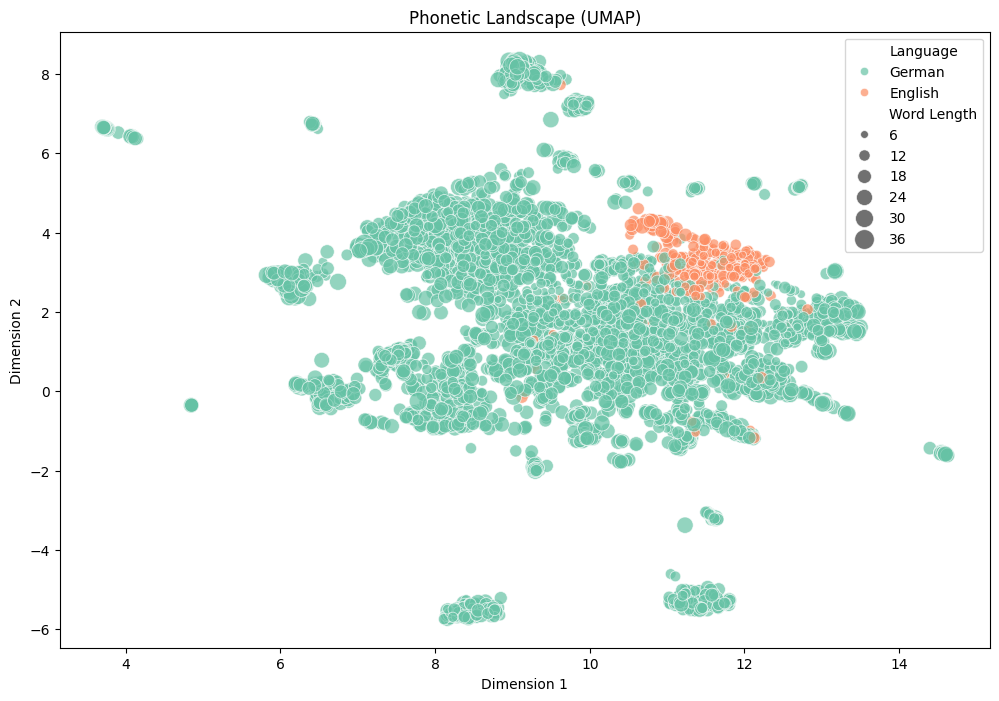

Embedding dimensions: (5000, 2)


In [5]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
import umap.umap_ as umap
import jellyfish
import random
def compute_similarity_matrix(data: List[str], metric: str = 'levenshtein') -> np.ndarray:
    if metric == 'levenshtein':
        from Levenshtein import distance as levenshtein_distance
        return pairwise_distances(data, metric=lambda x, y: levenshtein_distance(x, y))
    elif metric == 'jaro-winkler':
        return pairwise_distances(data, metric=lambda x, y: 1 - jellyfish.jaro_winkler_similarity(x, y))
    else:
        raise ValueError("Unsupported metric. Use 'levenshtein' or 'jaro-winkler'.")
# Prepare data
sample_size = 5000  # Adjust the sample size as needed
german_phonemes = [ipa for _, ipa in german_mapping]
english_phonemes = [ipa for _, ipa in english_mapping]
all_phonemes = german_phonemes + english_phonemes
labels = ['German'] * len(german_phonemes) + ['English'] * len(english_phonemes)
word_lengths = [len(ipa) for ipa in all_phonemes]
# Sample the data
sample_indices = random.sample(range(len(all_phonemes)), sample_size)
all_phonemes = [all_phonemes[i] for i in sample_indices]
labels = [labels[i] for i in sample_indices]
word_lengths = [word_lengths[i] for i in sample_indices]
# Compute similarity matrix
similarity_matrix = compute_similarity_matrix(all_phonemes, metric='jaro-winkler')
# Dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='precomputed')
embedding = reducer.fit_transform(similarity_matrix)
# Scatterplot
embedding_df = pd.DataFrame({
    'x': embedding[:, 0],
    'y': embedding[:, 1],
    'Language': labels,
    'Word Length': word_lengths
})
plt.figure(figsize=(12, 8))
sns.scatterplot(data=embedding_df, x='x', y='y', hue='Language', size='Word Length', palette='Set2', sizes=(20, 200), alpha=0.7)
plt.title('Phonetic Landscape (UMAP)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()
print(f"Embedding dimensions: {embedding.shape}")

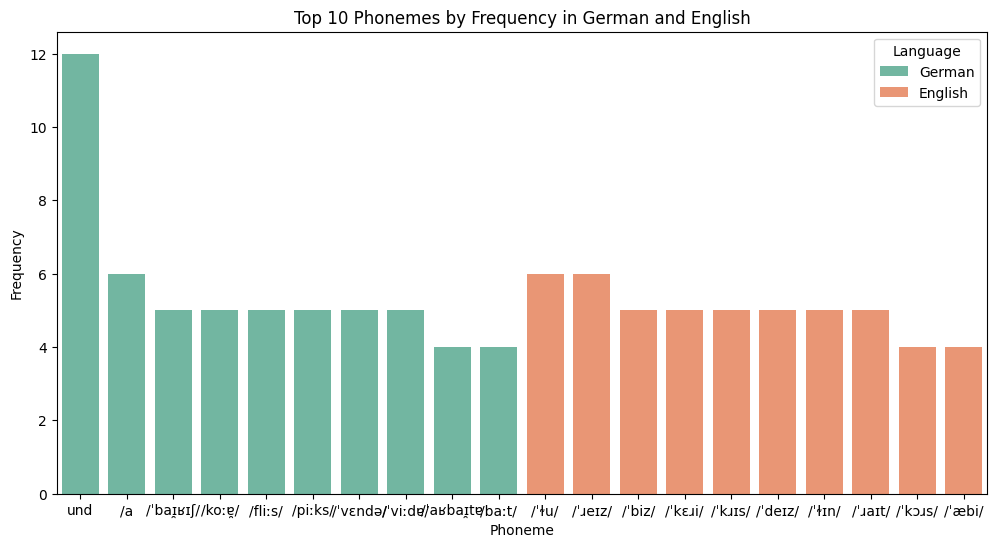

/tmp/ipykernel_1559789/643680071.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=labels, y=word_lengths, palette='Set2')


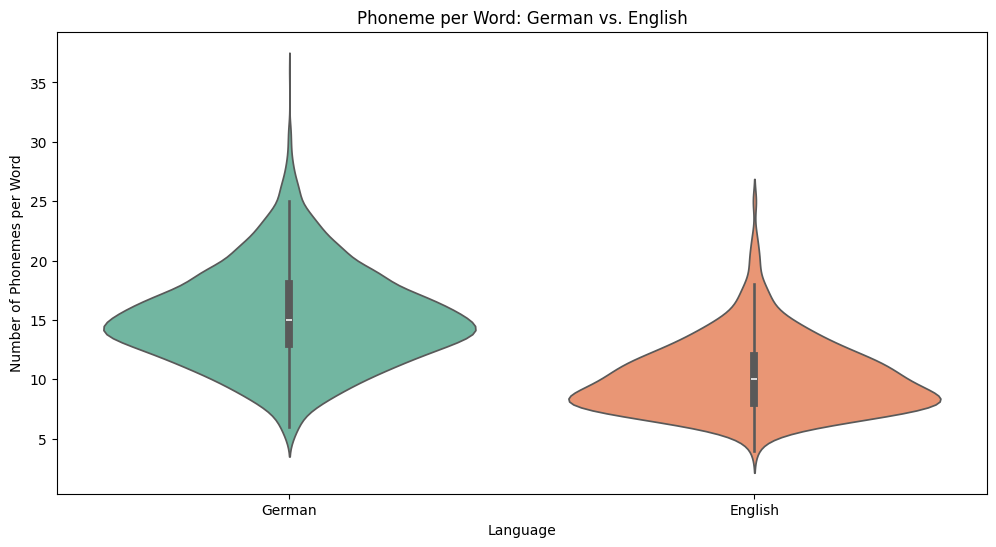

In [6]:
# Häufigkeitsverteilung (Bar Chart) - Top 10 Phoneme pro Sprache
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 Phoneme extrahieren
top_n = 10
german_top_phonemes = german_phoneme_freq.most_common(top_n)
english_top_phonemes = english_phoneme_freq.most_common(top_n)

# Daten für das Bar Chart vorbereiten
phoneme_data = pd.DataFrame({
    'Phoneme': [phoneme for phoneme, _ in german_top_phonemes + english_top_phonemes],
    'Frequency': [freq for _, freq in german_top_phonemes + english_top_phonemes],
    'Language': ['German'] * top_n + ['English'] * top_n
})

# Bar Chart erstellen
plt.figure(figsize=(12, 6))
sns.barplot(data=phoneme_data, x='Phoneme', y='Frequency', hue='Language', palette='Set2')
plt.title('Top 10 Phonemes by Frequency in German and English')
plt.xlabel('Phoneme')
plt.ylabel('Frequency')
plt.legend(title='Language')
plt.show()

# Längenvergleich (Boxplot/Violinplot) - Phoneme pro Wort
plt.figure(figsize=(12, 6))
sns.violinplot(x=labels, y=word_lengths, palette='Set2')
plt.title('Phoneme per Word: German vs. English')
plt.xlabel('Language')
plt.ylabel('Number of Phonemes per Word')
plt.show()

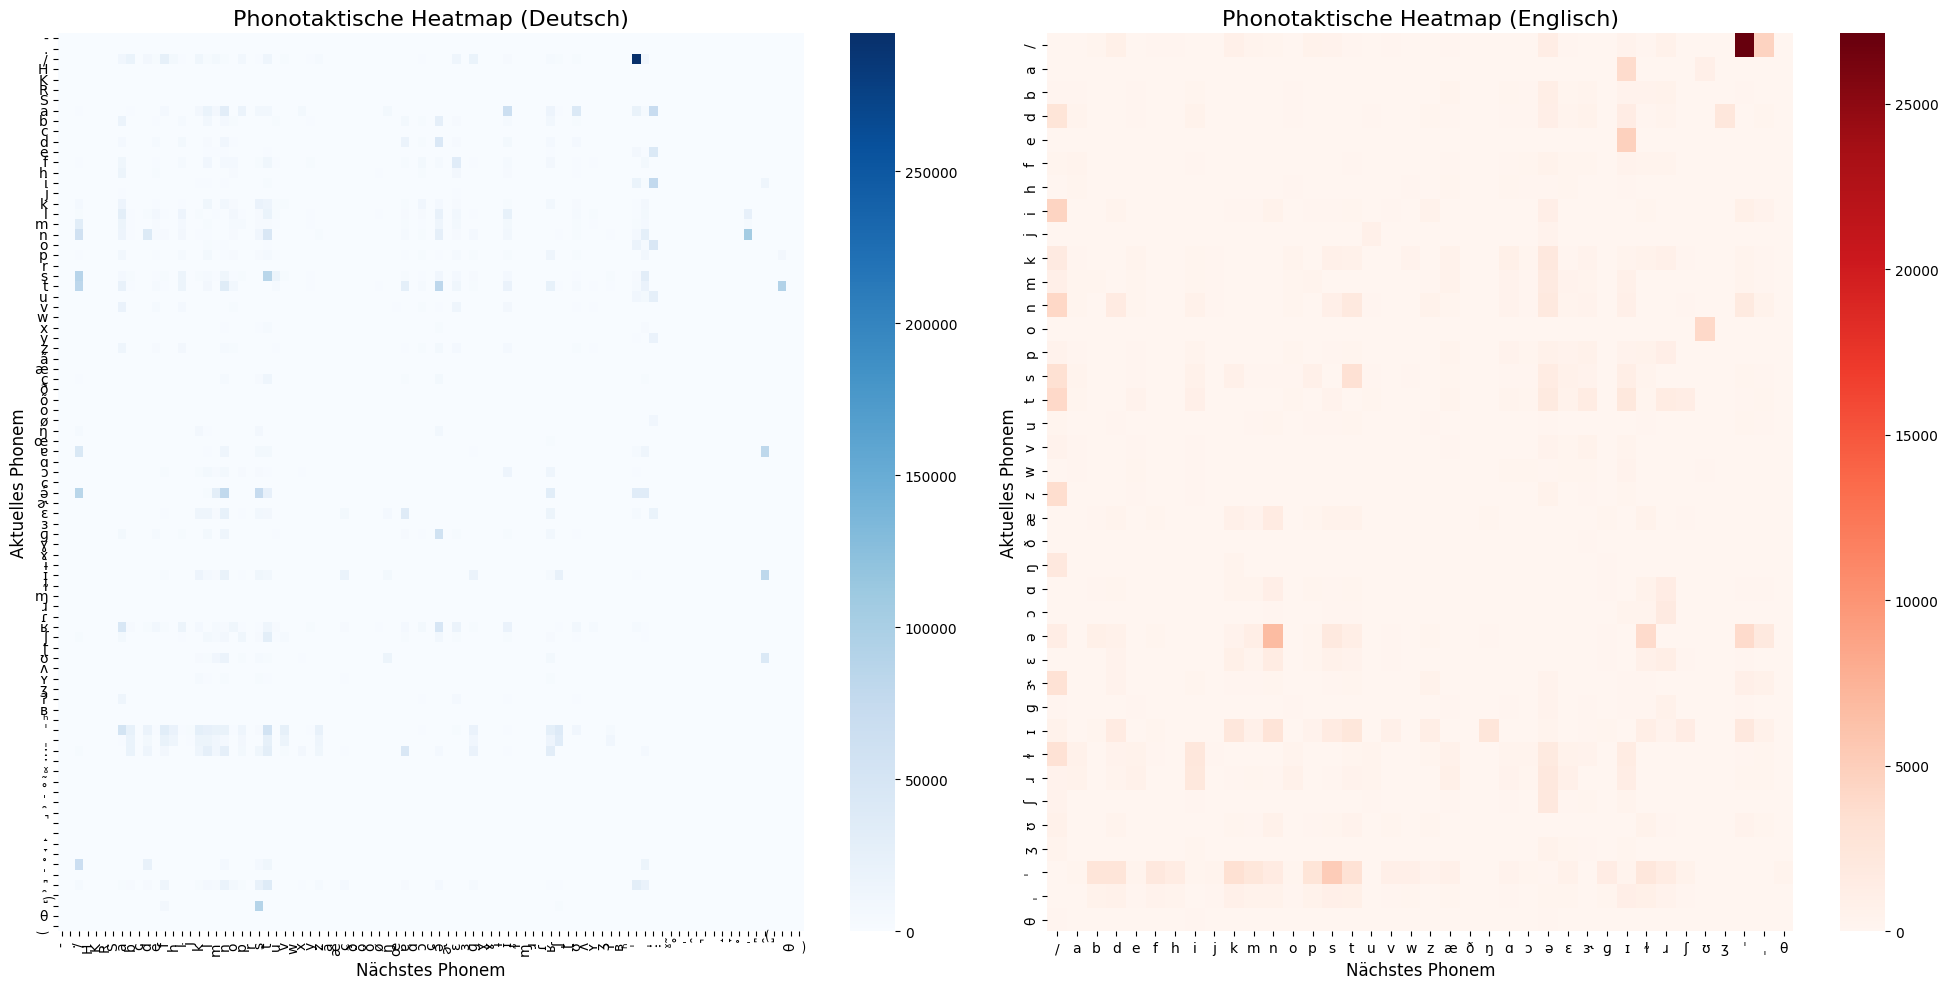

In [7]:
# Phonotaktische Heatmaps (Wer folgt wem?)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

def compute_transition_matrix(phoneme_sequences):
    """Erstellt eine Übergangsmatrix für Phoneme."""
    transitions = defaultdict(lambda: defaultdict(int))
    for sequence in phoneme_sequences:
        for i in range(len(sequence) - 1):
            current_phoneme = sequence[i]
            next_phoneme = sequence[i + 1]
            transitions[current_phoneme][next_phoneme] += 1
    
    # Konvertiere in eine sortierte Matrix
    phonemes = sorted(transitions.keys())
    matrix = np.zeros((len(phonemes), len(phonemes)))
    for i, current_phoneme in enumerate(phonemes):
        for j, next_phoneme in enumerate(phonemes):
            matrix[i, j] = transitions[current_phoneme].get(next_phoneme, 0)
    return matrix, phonemes

# Übergangsmatrizen für Deutsch und Englisch berechnen
german_sequences = [list(ipa) for _, ipa in german_mapping]
english_sequences = [list(ipa) for _, ipa in english_mapping]

german_matrix, german_phonemes = compute_transition_matrix(german_sequences)
english_matrix, english_phonemes = compute_transition_matrix(english_sequences)

# Heatmaps erstellen
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Deutsche Heatmap
sns.heatmap(german_matrix, ax=axes[0], xticklabels=german_phonemes, yticklabels=german_phonemes, cmap='Blues')
axes[0].set_title('Phonotaktische Heatmap (Deutsch)', fontsize=16)
axes[0].set_xlabel('Nächstes Phonem', fontsize=12)
axes[0].set_ylabel('Aktuelles Phonem', fontsize=12)

# Englische Heatmap
sns.heatmap(english_matrix, ax=axes[1], xticklabels=english_phonemes, yticklabels=english_phonemes, cmap='Reds')
axes[1].set_title('Phonotaktische Heatmap (Englisch)', fontsize=16)
axes[1].set_xlabel('Nächstes Phonem', fontsize=12)
axes[1].set_ylabel('Aktuelles Phonem', fontsize=12)

plt.tight_layout()
plt.show()